In [38]:
%pylab inline
from IPython.display import display, Math

Populating the interactive namespace from numpy and matplotlib


In [32]:
# Function to compute the coefficients of a 2nd degree
# polynomial using the least squares methode with some
# measurement points.
# See https://en.wikipedia.org/wiki/Least_squares
def compute_coefficients(points):
    k = len(points)

    # set all variables to 0
    sy = sx = syx = sx2 = sx3 = sx4 = syx2 = 0

    # calculate the sums
    for x, y in points:
        sx   = sx   + x
        sy   = sy   + y
        syx  = syx  + y*x
        sx2  = sx2  + x**2
        sx3  = sx3  + x**3
        sx4  = sx4  + x**4
        syx2 = syx2 + y*x**2

    # calculate the average values
    x   = sx   / k
    y   = sy   / k
    yx  = syx  / k
    x2  = sx2  / k
    x3  = sx3  / k
    x4  = sx4  / k
    yx2 = syx2 / k

    # calculate the a-coefficient
    a_z = (yx2 - y * x2) * (x2 - x**2) - (yx - y * x) * (x3 - x * x2)
    a_n = (x4 - x2**2) * (x2 - x**2) - (x3 - x * x2)**2
    a = a_z / a_n

    # calculate the b-coefficient
    b_z = yx - y * x - a * (x3 - x * x2)
    b_n = x2 - x**2
    b = b_z / b_n

    # calculate the c-coefficient
    c = y - a * x2 - b * x

    return (a, b, c)

In [66]:
# the measurements points
points = [(1.00,  0.38),
          (2.00,  1.15),
          (3.00,  2.71),
          (4.00,  3.92),
          (5.00,  5.93),
          (5.50,  6.66),
          (6.00,  8.56),
          (7.00, 11.24)]

# compute the coefficients
a, b, c = compute_coefficients(points)

# view the resulting polinomial
polinomial = r'f(x) = {a:0.4f} \cdot x^2 + {b:0.4f} \cdot x + {c:0.4f}'.format(a=a,b=b,c=c)
display(Math(polinomial))

<IPython.core.display.Math object>

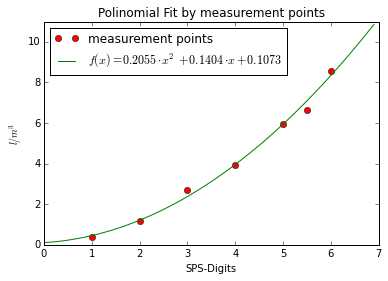

In [67]:
# example plot to visualize the results
pylab.axis([0, 7, 0, 11])
plt.title('Polinomial Fit by measurement points')
pylab.xlabel('SPS-Digits')
pylab.ylabel(r'$l/m^3$')

# the measurement points
x = [x for x,y in points]
y = [y for x,y in points]
pylab.plot(x, y, 'ro', label='measurement points')

# the polynomial
x = np.arange(0.0, 7.0, 0.1)
y = a * x**2 + b * x + c
pylab.plot(x, y, 'g-', label='${}$'.format(polinomial))

plt.legend(loc='upper left')
pylab.show()